# Threshold

圖像的閥值  
目的在於把圖像簡單化  
可以讓圖像的結構更簡單明瞭以利我們做特徵處理  
opencv有三種閥值處理的方法


## 簡單閥值

最基本的二元分割  
選定一個基準值以後做二元回歸  
函式為threshold()，傳入四個參數，分別為
 * 原圖
 * 閥值
 * 高於閥值的指定值
 * 轉換方法-常用的有
    *  cv2.THRESH_BINARY（超過定為白，不到定為黑） 
    *  cv2.THRESH_BINARY_INV（超過定為黑，不到定為白） 
    *  cv2.THRESH_TRUNC （超過定白） 
    *  cv2.THRESH_TOZERO (超過定為黑)
    *  cv2.THRESH_TOZERO_INV (低於定為黑)

In [2]:
import os
import cv2 as cv

root = os.getcwd()
img_path = os.path.join(root,'Image/lena.jpg')
img = cv.imread(img_path,0)

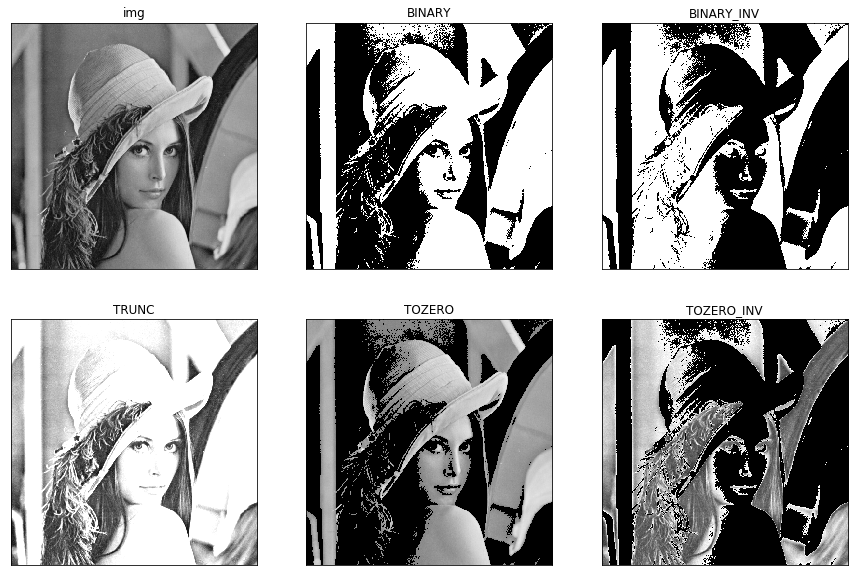

In [3]:
import matplotlib.pyplot as plt


ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['img','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## adaptiveThreshold

自適應閥值  
相較於簡單閥值是定義好一個值應用到整張圖像上的pixel  
自適應閥值是利用每個像素周圍點的值來決定其閥值  
函式為adaptiveThreshold（）
需要傳入六個參數，為

* 原始圖像
* 像素值上限
* 自適應方法 Adaptive Method有兩種方法
  * ADAPTIVE_THRESH_MEAN_C：區域內的均值
  * ADAPTIVE_THRESH_GAUSSIAN_C：區域內的加權值，分布為高斯分布
* 賦值方法，只有THRESH_BINARY& THRESH_BINARY_INV
* block size，區域大小選定
* 常數項，可以利用這個值調整適應出的閥值，計算出來的閥值會減去該值

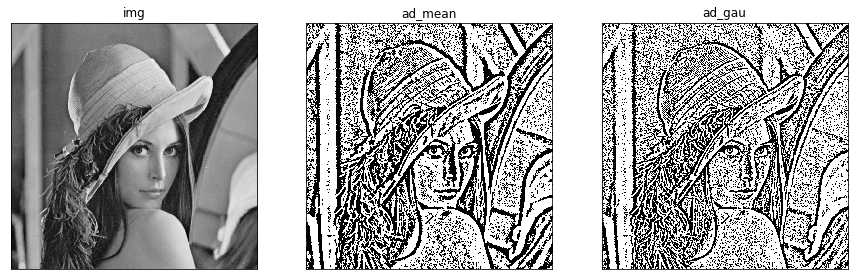

In [4]:
adthreshold1 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,15,2)
adthreshold2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,15,2)

images = [img,adthreshold1,adthreshold2]
titles = ['img','ad_mean','ad_gau']

plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])
    plt.title(titles[i])
plt.show()

## Otsu’s

threshold是有回傳兩個值  
其中一個是影像，另一個返回值是Otsu's演算法找出的值  
這個值是讓找出的閥值對於整張影像的變異數最小的值  
也就是說，這個適合用在直方圖上看到分布是有雙峰值得  
要利用這個threshold的話，在函示內的threshold設置為0，並且在分類方法加上THRESH_OTSU

[Otsu's algorithm wikipedia](https://zh.wikipedia.org/wiki/%E5%A4%A7%E6%B4%A5%E7%AE%97%E6%B3%95)

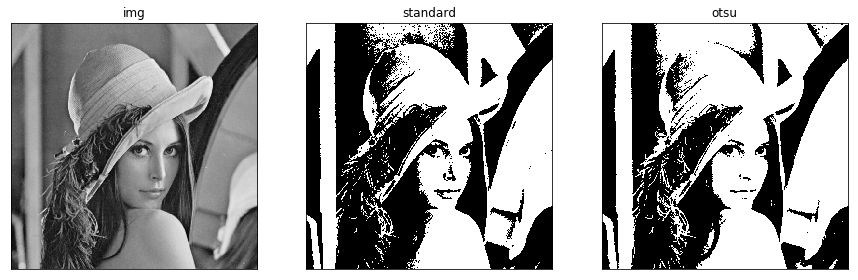

otsu value is 117.0


In [5]:
otsu1, threshold1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
otsu2, threshold2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

images = [img,threshold1,threshold2]
titles = ['img','standard','otsu']

plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])
    plt.title(titles[i])
plt.show()

print('otsu value is',otsu2)